In [1]:
# Dump Path: r'/content/drive/My Drive/BE Project/Rewards Dataset Classification Dumps/'
# Dataset Path
# r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/11.Rewards Dataset (Final)/Rewards Dataset Cleaned Final.csv'

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/11.Rewards Dataset (Final)/Rewards Dataset Cleaned Final.csv')
print(df.shape)
df.head()

(40479, 16)


,main_category,sub_category,country,status,goal,pledged,backers,levels,reward_levels,updates,comments,duration,min_reward,max_reward,mean_reward,median_reward
0,1,1,10,1,10500,11545,66,7,"[25, 50, 100, 250, 500, 1000, 2500]",10,2,30,25,2500,632,250
1,7,2,10,0,4000,20,2,5,"[1, 5, 10, 25, 50]",6,0,47,1,50,18,10
2,1,3,10,1,6000,6535,100,13,"[1, 10, 25, 30, 50, 75, 85, 100, 110, 250, 500...",4,0,32,1,5000,557,85
3,10,4,10,0,3500,0,0,6,"[10, 25, 50, 100, 150, 250]",2,0,30,10,250,98,75
4,1,1,10,1,3500,3582,39,7,"[5, 25, 50, 100, 250, 500, 1000]",8,0,21,5,1000,276,100


In [35]:
X=df[['main_category','sub_category','country','goal','levels','duration','min_reward','max_reward','mean_reward','median_reward', 'updates', 'comments']]
Y=df['status']

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (32383, 12)
Test Shape: (8096, 12)


#Algorithms

In [8]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Score: ", dt.score(X_test, y_test))

Score:  0.77149209486166


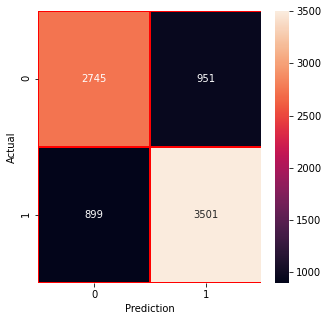

In [9]:
# Confusion Matrix
y_predict = dt.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [10]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      3696
           1       0.79      0.80      0.79      4400

    accuracy                           0.77      8096
   macro avg       0.77      0.77      0.77      8096
weighted avg       0.77      0.77      0.77      8096



In [11]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
dt_eval = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
dt_eval.mean()

0.7694475204812564

In [12]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
for i in range(100, 1001, 100):
  clf = RandomForestClassifier(n_estimators=i)
  clf.fit(X_train, y_train)
  y_predict = clf.predict(X_test)
  print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.8384387351778656
Accuracy: 0.8400444664031621
Accuracy: 0.8375741106719368
Accuracy: 0.8380681818181818
Accuracy: 0.8379446640316206
Accuracy: 0.8399209486166008
Accuracy: 0.837697628458498
Accuracy: 0.8385622529644269
Accuracy: 0.8415266798418972
Accuracy: 0.8383152173913043


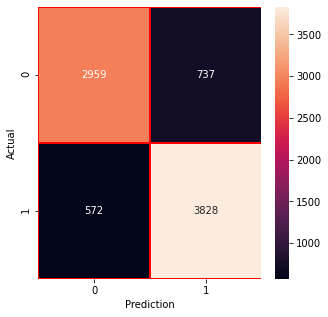

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [14]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      3696
           1       0.84      0.87      0.85      4400

    accuracy                           0.84      8096
   macro avg       0.84      0.84      0.84      8096
weighted avg       0.84      0.84      0.84      8096



In [15]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
clf_eval = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
clf_eval.mean()

0.8416141695720833

In [16]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Score: ", lr.score(X_test,y_test))

Score:  0.8153409090909091


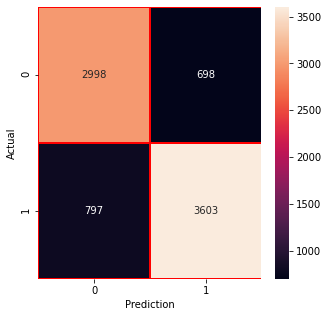

In [17]:
# Confusion Matrix
y_predict = lr.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [18]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      3696
           1       0.84      0.82      0.83      4400

    accuracy                           0.82      8096
   macro avg       0.81      0.82      0.81      8096
weighted avg       0.82      0.82      0.82      8096



In [19]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
lr_eval = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
lr_eval.mean()

0.815767950097074

In [20]:
# SVM 
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
print("Score: ", clf.score(X_test,y_test))

Score:  0.8029891304347826


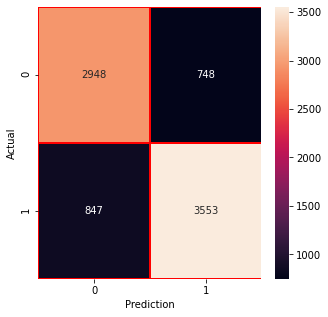

In [21]:
# Confusion Matrix
y_predict = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [22]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      3696
           1       0.83      0.81      0.82      4400

    accuracy                           0.80      8096
   macro avg       0.80      0.80      0.80      8096
weighted avg       0.80      0.80      0.80      8096



In [23]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
clf_eval = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
clf_eval.mean()

0.7975171631412329

In [24]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 101, 10):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  print("Score: ", neigh.score(X_test,y_test))

Score:  0.7092391304347826
Score:  0.7669219367588933
Score:  0.7706274703557312
Score:  0.7700098814229249
Score:  0.7708745059288538
Score:  0.7702569169960475
Score:  0.7690217391304348
Score:  0.7656867588932806
Score:  0.7656867588932806
Score:  0.764451581027668


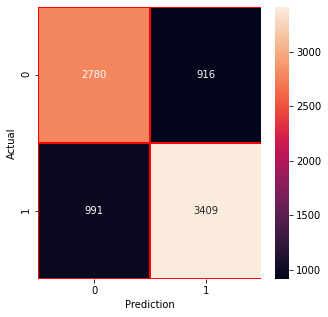

In [25]:
# Confusion Matrix
y_predict = neigh.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [26]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      3696
           1       0.79      0.77      0.78      4400

    accuracy                           0.76      8096
   macro avg       0.76      0.76      0.76      8096
weighted avg       0.76      0.76      0.76      8096



In [27]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
neigh_eval = cross_val_score(estimator = neigh, X = X_train, y = y_train, cv = 10)
neigh_eval.mean()

0.765741128666398

In [28]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
print("Score: ", clf.score(X_test,y_test))

Score:  0.6262351778656127


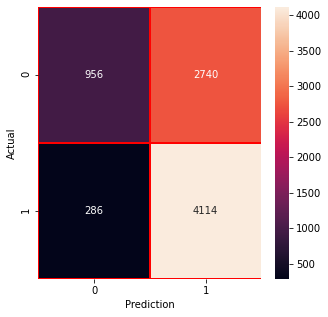

In [29]:
# Confusion Matrix
y_predict = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [30]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.26      0.39      3696
           1       0.60      0.94      0.73      4400

    accuracy                           0.63      8096
   macro avg       0.68      0.60      0.56      8096
weighted avg       0.68      0.63      0.57      8096



In [31]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
clf_eval = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
clf_eval.mean()

0.6451544458642842

#MLP

In [37]:
from keras.models import Sequential
from keras.layers import Dense

In [38]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='swish'))
#model.add(Dense(10,  activation='swish'))
model.add(Dense(8,  activation='swish'))
model.add(Dense(1,  activation='sigmoid'))

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
h=model.fit(X_train, y_train, epochs=150, batch_size=8)

Epoch 1/150
4048/4048 [==============================] - 7s 2ms/step - loss: 8.4509 - accuracy: 0.5234
Epoch 2/150
4048/4048 [==============================] - 6s 1ms/step - loss: 1.5775 - accuracy: 0.5621
Epoch 3/150
4048/4048 [==============================] - 6s 2ms/step - loss: 1.5385 - accuracy: 0.5659
Epoch 4/150
4048/4048 [==============================] - 6s 2ms/step - loss: 1.4723 - accuracy: 0.5698
Epoch 5/150
4048/4048 [==============================] - 6s 1ms/step - loss: 1.2591 - accuracy: 0.5706
Epoch 6/150
4048/4048 [==============================] - 6s 1ms/step - loss: 1.1395 - accuracy: 0.5792
Epoch 7/150
4048/4048 [==============================] - 6s 1ms/step - loss: 1.0989 - accuracy: 0.5762
Epoch 8/150
4048/4048 [==============================] - 6s 2ms/step - loss: 0.8742 - accuracy: 0.5876
Epoch 9/150
4048/4048 [==============================] - 6s 1ms/step - loss: 0.7775 - accuracy: 0.5896
Epoch 10/150
4048/4048 [==============================] - 6s 1ms/step - l

In [40]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

253/253 [==============================] - 0s 953us/step - loss: 0.6556 - accuracy: 0.6101
Accuracy: 61.01


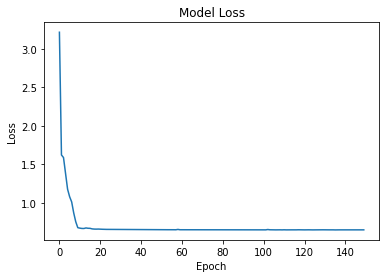

In [41]:
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()